# ROC Curves and AUC - Lab


## Introduction 

In this lab, we'll practice drawing ROC graphs, calculating AUC, and interpreting these results. In doing so, we will also further review logistic regression, by briefly fitting a model as in a standard data science pipeline.

## Objectives

You will be able to:

* Evaluate classification models using various metrics
* Define and understand ROC and AUC

## Training the Model

Start by repeating the previous modelling steps we have discussed. For this problem, you are given a dataset **mushrooms.csv**. You're first job is to train a LogisticRegression classifier on the dataset to determine whether the mushroom is **e**dible or **p**oisonous. The first column of the dataset *class* indicates whether or not the mushroom is poisonous or edible.

** For consistency use random_state=0**

In [10]:
#Your code here
import pandas as pd
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import train_test_split as tts
df = pd.read_csv('mushrooms.csv')
df.head()
y = df['class']
x = df[df.columns[:-1]]
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [30]:
x = pd.get_dummies(x)
x_train, x_test, y_train, y_test = tts(x,y, random_state=0)
reg = lr(fit_intercept=False, C=1e12)
model = reg.fit(x_train, y_train)
model

/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [31]:
y_hat_test = reg.predict(x_test)

## ROC Metrics
  
Next, calculate the false positive rate and true positive rate (you can use the built in metrics from SciKit-Learn) of your classifier.

In [37]:
from sklearn.metrics import roc_curve, auc
y_score = model.decision_function(x_test)
fpr,tpr,thresholds = roc_curve(y_test, y_score, pos_label='p')
y_train_score = model.decision_function(x_train)
train_fpr, train_tpr, train_thresolds = roc_curve(y_train, y_train_score, pos_label='p')
auc(fpr, tpr)

1.0

## Drawing the ROC Graph

Next, use the false positive rate and true positive rate to plot the Receiver Operating Characteristic Curve for both the train and test sets.

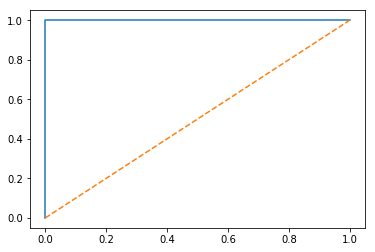

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')

## Interpretation:

What do you notice about these ROC curves?

## Your answer here

## Interpretation
Look at the ROC curve graph from the lesson:  

<img src="images/lesson_roc_graph.png">

Think about the scenario of this model: predicting heart disease. If you tune the current model to have and 82% True Positive Rate, (you've still missed 20% of those with heart disease), what is the False positive rate?

In [ ]:
fpr = #write the approximate fpr when tpr=.8
# .18

## Interpretation 2
If you instead tune the model to have a 95.2% True Postive Rate, what will the False Postive Rate be?

In [ ]:
fpr = #write the approximate fpr when tpr=.95
# .27

## Opinion
In the case of heart disease that we've been talking about, do you find any of the above cases acceptable? How would you tune the model. Describe what this would mean in terms of the number of patients falsely scared of having heart disease and the risk of missing the warning signs for those who do actually have heart disease.

## Your answer here

## Summary

In this lesson we further explored ROC curves and AUC, drawing graphs and then interpreting these results to lead to a more detailed and contextualized understanding of our model's accuracy.